<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import libraries
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn import metrics #Import scikit-learn metrics module 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [7]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome



In [14]:
#EM for all parameters

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
xs = pd.DataFrame(scaled_x, columns = x.columns)

gmm = GaussianMixture(n_components=2, max_iter=1000, covariance_type='spherical', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(xs)
toc = time.perf_counter()
labels = abs(gmm_y-1) #correct cluster-label scheme
    
acc = accuracy_score(y, labels)
print("Accuracy using GMM = ", acc)

tn, fp, fn, tp = confusion_matrix(y, labels).ravel()/y.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y, labels))
print(mean_absolute_error(y, labels))
print(np.mean(y-labels))
print(np.std(y-labels))

Accuracy using GMM =  0.6705729166666666
tp:  0.2890625
fp:  0.26953125
fn:  0.059895833333333336
tn:  0.3815104166666667
err:  0.3294270833333333
time:  0.014404789000025175
0.3294270833333333
0.3294270833333333
-0.20963541666666666
0.5343033552321438


In [33]:
# EM with only glucose level, Age, BMI 
x1=x.drop(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin' , 'DiabetesPedigreeFunction'], axis=1)

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x1)
scaled_x = scaler.transform(x1)
xs = pd.DataFrame(scaled_x, columns = x1.columns)

gmm = GaussianMixture(n_components=2, max_iter=1000, covariance_type='spherical', random_state=1)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(xs)
toc = time.perf_counter()
labels = abs(gmm_y-1) #correct label scheme
    
acc = accuracy_score(y, labels)
print("Accuracy using GMM = ", acc)

tn, fp, fn, tp = confusion_matrix(y, labels).ravel()/y.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y, labels))
print(mean_absolute_error(y, labels))
print(np.mean(y-labels))
print(np.std(y-labels))



Accuracy using GMM =  0.6809895833333334
tp:  0.2643229166666667
fp:  0.234375
fn:  0.08463541666666667
tn:  0.4166666666666667
err:  0.3190104166666667
time:  0.016004173999988325
0.3190104166666667
0.3190104166666667
-0.14973958333333334
0.544599370041709


Accuracy using GMM =  0.7356770833333334
tp:  0.19270833333333334
fp:  0.10807291666666667
fn:  0.15625
tn:  0.54296875
err:  0.2643229166666667
time:  0.007379712999977528
0.2643229166666667
0.2643229166666667


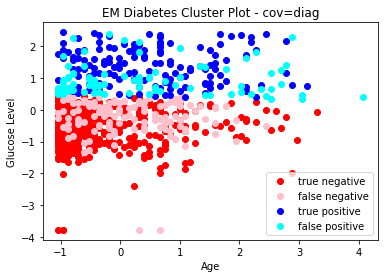

In [49]:
# EM with only glucose level, Age
x1=x.drop(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin' , 'DiabetesPedigreeFunction', 'BMI'], axis=1)

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x1)
scaled_x = scaler.transform(x1)
xs = pd.DataFrame(scaled_x, columns = x1.columns)


gmm = GaussianMixture(n_components=2, max_iter=1000, covariance_type='spherical', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x1)
toc = time.perf_counter()
labels = abs(gmm_y-1) #correct label scheme
    
acc = accuracy_score(y, labels)
print("Accuracy using GMM = ", acc)

tn, fp, fn, tp = confusion_matrix(y, labels).ravel()/y.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y, labels))
print(mean_absolute_error(y, labels))

clx=xs
clx['Cluster']=labels
clx['Outcome']=y

cl0 = clx.loc[clx['Cluster'] == 0]
cl0tn = cl0.loc[cl0['Outcome'] == 0]   # true negatives
cl0fn = cl0.loc[cl0['Outcome'] == 1]   # false negatives


cl1 = clx.loc[clx['Cluster'] == 1]
cl1tp = cl1.loc[cl1['Outcome'] == 1]   # true postives
cl1fp = cl1.loc[cl1['Outcome'] == 0]   # false postives

pyplot.scatter(cl0tn.Age, cl0tn.Glucose, color='red', label='true negative')
pyplot.scatter(cl0fn.Age, cl0fn.Glucose, color='pink', label='false negative')
#pyplot.scatter(cl_centers[0][1], cl_centers[0][0], color='black', marker='+', s=288, label='cluster 0 center')

pyplot.scatter(cl1tp.Age, cl1tp.Glucose, color='blue', label='true positive')
pyplot.scatter(cl1fp.Age, cl1fp.Glucose, color='cyan', label='false positive')
#pyplot.scatter(cl_centers[1][1], cl_centers[1][0], color='black', marker='x', s=244, label='cluster 1 center')

pyplot.title('EM Diabetes Cluster Plot - cov=diag')
pyplot.ylabel('Glucose Level')
pyplot.xlabel('Age')
pyplot.legend()